# Summary

This notebook is for analysis and visualization of the data story.

This notebook is for data ingestion and carpentry parts of the project. First, we will load the CSV files and subset the data to 2002 - 2019 seasons. We will reformat variables and create new ones. We will create additional player performance metrics that will be used in further analysis. We will also standartize position names and update the historical team name abrevations variables. At the end we will join our data sets into one final data frame we will be using in further analysis.


## Notebook Outline:
- Notebook setup
- Loading data
- How long do NBA carrers last?
   
- NBA Sason Stats and Player data
    - cleaning and reformating variables
    - creating new variables
    - joining NBA Season Stats and Player data frames
    - creating NBA Player Per Game
- Team ranking and NBA championship teams data
    - filtering and creating new variables
    - aggregate daily team ranking data frame
    - updating Team name abrevations
- Joining all data frames into one



## Summary

This notebook is for analysis and visualization of the data story.

#### Notebook Outline

- Setup
- How long do NBA carrers last?
- How are we defining veteran players?
- How veteran players compare to non-veteran?
- Vizualization for comparing Veterans and Non-Veterans
- How do veteran players perform over time?




# Notebook start


### Setup

- installing extra packages
- loading libraries
- turning off factors
- loading data frame



In [1]:
# install extra packages
install.packages("sqldf")
install.packages("ggcorrplot")
install.packages("ggthemes")
install.packages("plotly")

# load libraries
library(tidyr)
library(dplyr)
library(sqldf)
library(ggplot2)
library(ggthemes)
library(ggcorrplot)
library(plotly)

# turn off Factors to load columns as characters 
options('stringsAsFactors'=FALSE)
# turn off sci number notations
options(scipen = 999)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: gsubfn
Loading required package: proto
Warning message:
“no DISPLAY variable so Tk is not available”Loading required package: RSQLite

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



# Loading data

We will load our final data frame. This data frame was created in the **data_carpetry** notebook from the raw data CSV files. 


In [2]:

# load data frame
file1 <- "../../../casestudy_Group2/GroupProducts/Milestone6/final_df.csv"
df <- read.csv(file1)

# number of rows and columns
dim(df)

# number of seasons
length(unique(df$Year))

[1] 8210   74

[1] 16

Our final data set has 8,210 player records for 16 seasons (2002 - 2019).


How many players do we have in our final set? 



In [3]:
# total number of unique players 
df %>%
    summarise(count = n_distinct(paste(Player,birth_date)))

count
<int>
1537


How many players per season?

In [4]:
# number of players per season
df %>% 
    group_by(Year) %>%
    summarise(count = n_distinct(paste(Player,birth_date)))

Year,count
<int>,<int>
2002,436
2003,425
2004,439
2005,460
2006,454
2007,454
2008,446
2009,440
2010,439


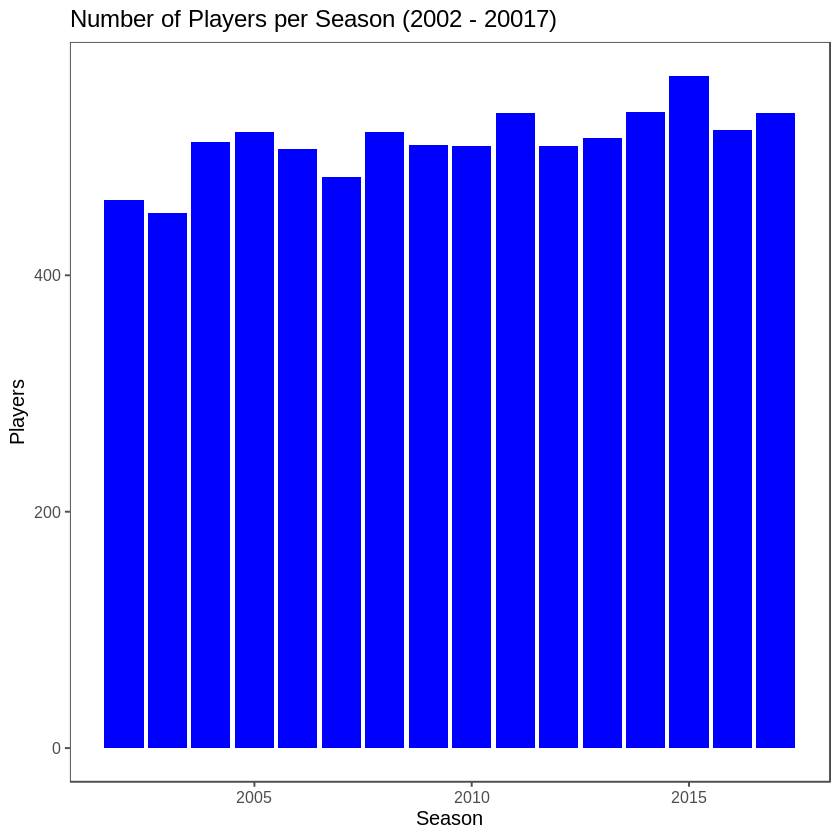

In [5]:
# plot number of players per season (2002 - 20017)
df %>%
    ggplot(aes(Year)) +
    geom_bar(fill="blue") +
    ggtitle("Number of Players per Season (2002 - 20017)") +
    xlab("Season") +
    ylab("Players") + 
    theme_few()

In [6]:
# display top rows
head(df)

X,index,Year,Player,Position,Age,G,GS,MP,PER,⋯,birth_date,college,Playing_Career_Length,Season_Career_Length,Team,team_G,team_W,team_L,team_W_PCT,champ_team
<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,⋯,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<int>
1,15506,2002,Tariq Abdul-Wahad,SG,27,20,12,417,10.3,⋯,"November 3, 1974",San Jose State University,5,4,DEN,82,17,65,0.207,0
2,15507,2002,Tariq Abdul-Wahad,SG,27,4,0,24,0.3,⋯,"November 3, 1974",San Jose State University,5,4,DAL,82,60,22,0.732,0
3,15508,2002,Shareef Abdur-Rahim,PF,25,77,77,2980,19.8,⋯,"December 11, 1976",University of California,11,5,ATL,82,35,47,0.427,0
4,15509,2002,Courtney Alexander,SG,24,56,28,1325,13.6,⋯,"April 27, 1977","California State University, Fresno",2,1,WAS,82,37,45,0.451,0
5,15510,2002,Victor Alexander,C,32,15,0,97,9.2,⋯,"August 31, 1969",Iowa State University,10,10,DET,82,50,32,0.610,0
6,15511,2002,Malik Allen,PF,23,12,2,161,15.0,⋯,"June 27, 1978",Villanova University,9,0,MIA,82,25,57,0.305,0


# How long do NBA carrers last?

To answer this question we are going to take a look at how many seasons players play. 

- Summary statistics for the number of seasons played
- Distribution of number of seasons played
- How does player age distribution looks like?
    - Players age range by season (min, max, median)
    - Players age distribution


In [7]:
# create data frame for player season career length distribution
# select max number of seasons played per player
n1 <- df %>%
    group_by(Player, birth_date) %>%
    summarise(seasons = max(Season_Career_Length))

# print top rows
head(n1)

Player,birth_date,seasons
<chr>,<chr>,<int>
A.J. Guyton,"February 12, 1978",2
A.J. Hammons,"August 27, 1992",0
A.J. Price,"October 7, 1986",5
Aaron Brooks,"January 14, 1985",9
Aaron Gordon,"September 16, 1995",2
Aaron Gray,"December 7, 1984",6


Lets take a look at the summary statistics for the number of seasons played for all players in our data set.

In [8]:
# summary statistics for number of seasons played
summary(n1$seasons)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   5.407   9.000  22.000 


Next, we will look at the distribution of number of seasons played in our data set.

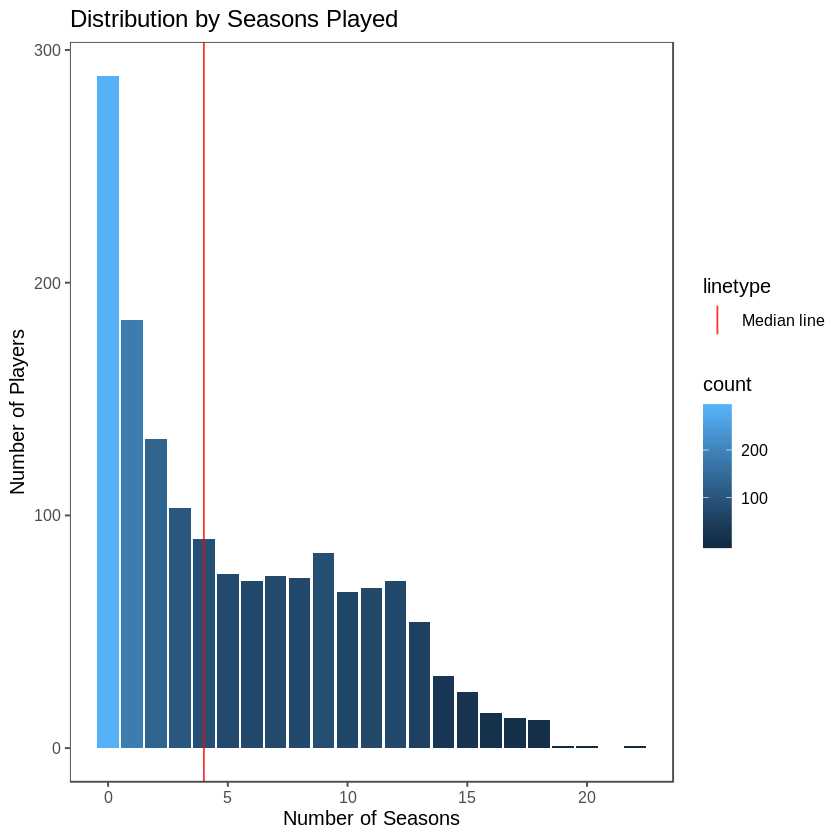

In [9]:
# plot distribution of number of seasons played 
n1 %>%
    ggplot(aes(seasons)) +
    geom_bar(aes(fill = ..count..)) +
    ggtitle("Distribution by Seasons Played") +
    geom_vline(aes(xintercept = median(seasons, na.rm = T), linetype = "Median line"),
               col = "red",
               alpha = 0.8) +
    xlab("Number of Seasons") +
    ylab("Number of Players") + 
    theme_few()


### How does player age distribution looks like?

We are going to take a look at the folowing breakdowns:
- Players age range by season (min, max, median).
- Min and Max NBA players age.

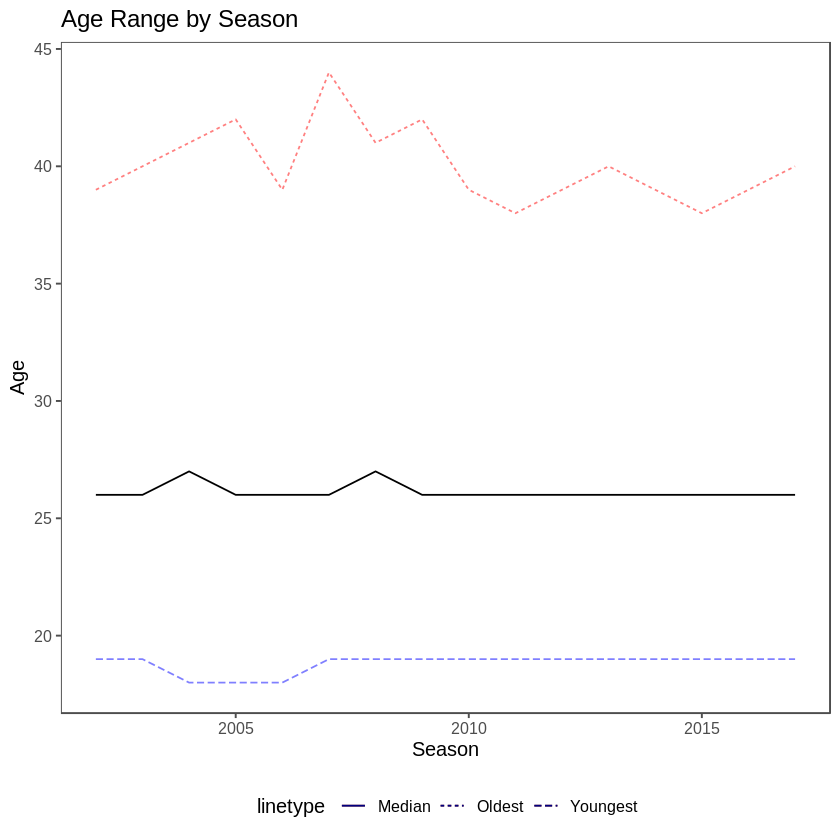

In [10]:
# plot min, max, median players age by seasons
df %>%
    group_by(Year) %>%
    summarise(Median = median(Age),
              Max = max(Age),
              Min = min(Age)) %>%
    ggplot(aes(Year)) +
    geom_line(aes(y = Max, linetype = "Oldest"), color = "red", alpha = 0.5) +
    geom_line(aes(y = Median, linetype = "Median"), color = "black") +
    geom_line(aes(y = Min, linetype = "Youngest"), color = "blue", alpha = 0.5) +
    ggtitle("Age Range by Season") +
    xlab("Season") +
    ylab("Age") + 
    #scale_linetype_manual(name = "", values = c(1, 1, 1)) +
    #guides(group=FALSE) +
    theme_few() + 
    theme(legend.position="bottom")


The median and youngest players age have been consistand throughout the 2002 - 2017 seasons. 


Next, we will look at the Min and Max NBA players age distributions.

In [11]:
# create data frame for min and max playing age per player
nage <- df %>%
    group_by(Player, birth_date) %>%
    summarise(MinAge = min(Age),
              MaxAge = max(Age)) %>%
    gather(Parameter, Value, MinAge:MaxAge)

head(nage)

Player,birth_date,Parameter,Value
<chr>,<chr>,<chr>,<int>
A.J. Guyton,"February 12, 1978",MinAge,23
A.J. Hammons,"August 27, 1992",MinAge,24
A.J. Price,"October 7, 1986",MinAge,23
Aaron Brooks,"January 14, 1985",MinAge,23
Aaron Gordon,"September 16, 1995",MinAge,19
Aaron Gray,"December 7, 1984",MinAge,23


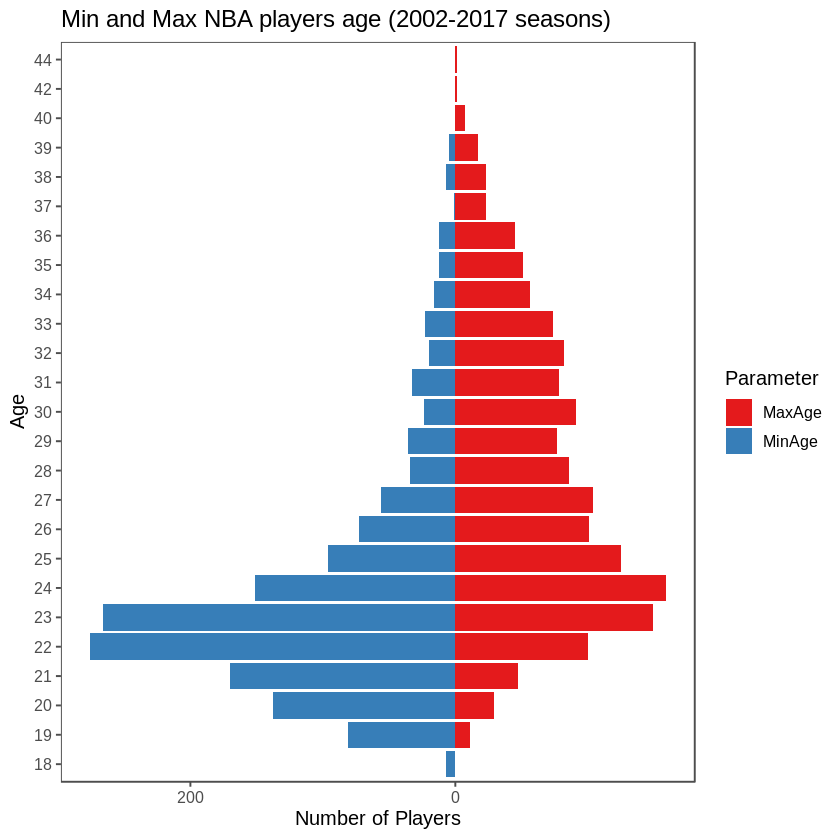

In [12]:
# chart min and max players age distribution in our data set
nage %>%
    ggplot(aes(x=as.factor(Value),fill=Parameter)) + 
    geom_bar(data=filter(nage, Parameter == "MaxAge")) + 
    geom_bar(data=filter(nage, Parameter == "MinAge"), aes(y = ..count.. * (-1))) +
    ggtitle("Min and Max NBA players age (2002-2017 seasons)") +
    xlab("Age") +
    ylab("Number of Players") +
    scale_y_continuous(breaks=seq(-200,0,200),labels=abs(seq(-200,0,200))) +
    scale_fill_brewer(palette = "Set1") + 
    coord_flip() +
    theme_few()

<br/><br/>
<br/><br/>

# How are we defining Veteran players?

We are using Season Career Length variable to define veteran players. Season Career Length is the number of years the player has been in the league by each season. We will take a look at how Season_Career_Length changes over time, by teams, and by playing position to determine the cuttof age for the veteran player calsification. We will create an Veteran binary variable based on the cuttof.


- summary statistics for Season Career Length
- mean, median, min, max, std of Season Career Length 
    - by season
    - by position
- histogram of Season Career Length by position
- density plot of Season Career Length position
- box plot median Season Career Length by position
- distribution of the median Season Career Length by position by season
- create Veteran binary variable


In [13]:
# summary statistics for Season_Career_Length 
summary(df$Season_Career_Length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   4.000   4.835   8.000  22.000 

In [14]:
# mean, median, min, max, std of Season Career Length by season
df %>% select(c("Year", 'Season_Career_Length')) %>%
    group_by(Year) %>%
    summarise(mean = mean(Season_Career_Length), 
              median = median(Season_Career_Length),
              min = min(Season_Career_Length),
              max = max(Season_Career_Length),
              std = sd(Season_Career_Length))


Year,mean,median,min,max,std
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
2002,4.896552,4,0,17,4.213276
2003,4.763797,4,0,18,4.182170
2004,4.904483,4,0,19,4.037500
2005,4.873321,4,0,20,4.012394
2006,4.475345,4,0,16,3.783269
2007,4.523810,4,0,22,3.967837
2008,4.930902,4,0,16,3.918279
2009,4.921569,4,0,17,3.878018
2010,4.927308,4,0,17,3.940080


In [15]:
# mean, median, min, max, std of Season Career Length by position
df %>% select(c("Position", 'Season_Career_Length')) %>%
    group_by(Position) %>%
    summarise(mean = mean(Season_Career_Length), 
              median = median(Season_Career_Length), 
              min = min(Season_Career_Length),
              max = max(Season_Career_Length),
              std = sd(Season_Career_Length))


Position,mean,median,min,max,std
<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
C,5.124118,4,0,20,4.211088
PF,4.943329,4,0,22,4.154898
PG,4.811344,4,0,18,4.063065
SF,4.785244,4,0,19,4.068302
SG,4.498210,4,0,18,3.949305


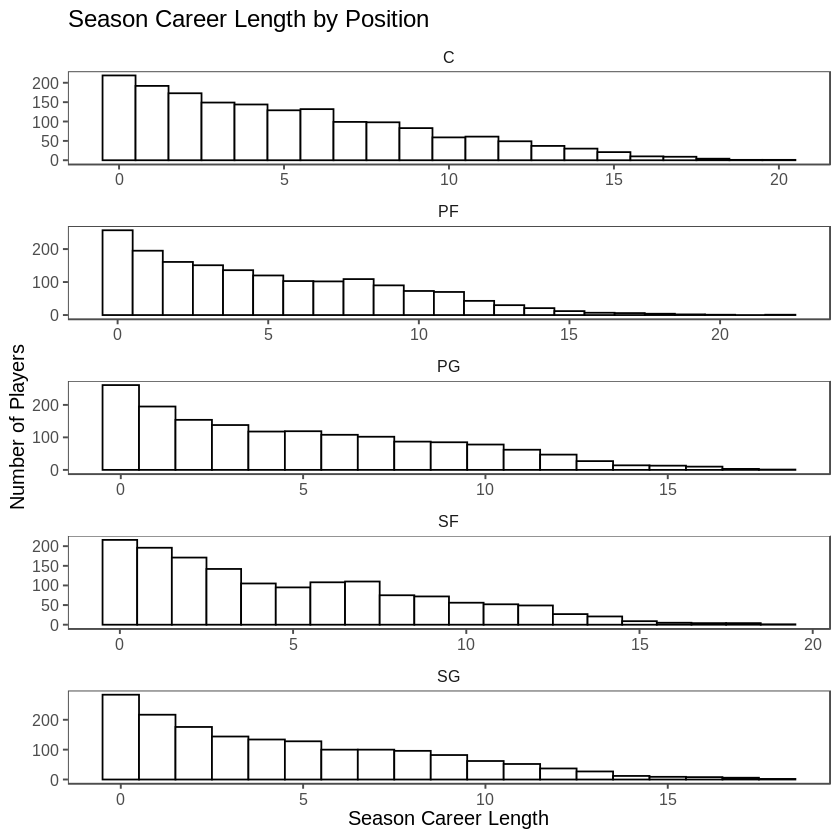

In [16]:
# histogram of Season Career Length by position
ggplot(df, aes(x=Season_Career_Length)) + 
geom_histogram(binwidth=1,
               color="black", 
               fill="white") +
labs(y="Number of Players", 
     x="Season Career Length", 
     title="Season Career Length by Position") + 
theme_few() + 
facet_wrap( ~ Position, ncol=1, scales = 'free')

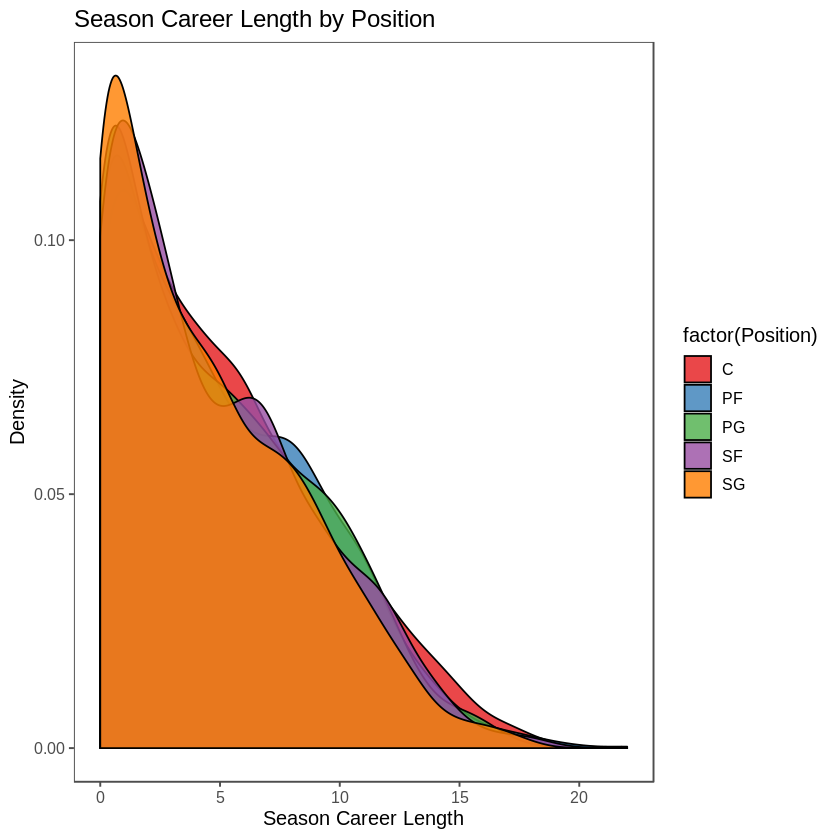

In [17]:
# density plot of Season Career Length by position
ggplot(df, aes(x=Season_Career_Length)) + 
geom_density(aes(fill=factor(Position)), alpha=0.8) + 
labs(y="Density", 
     x="Season Career Length", 
     title="Season Career Length by Position") + 
scale_fill_brewer(palette = "Set1") + 
theme_few()


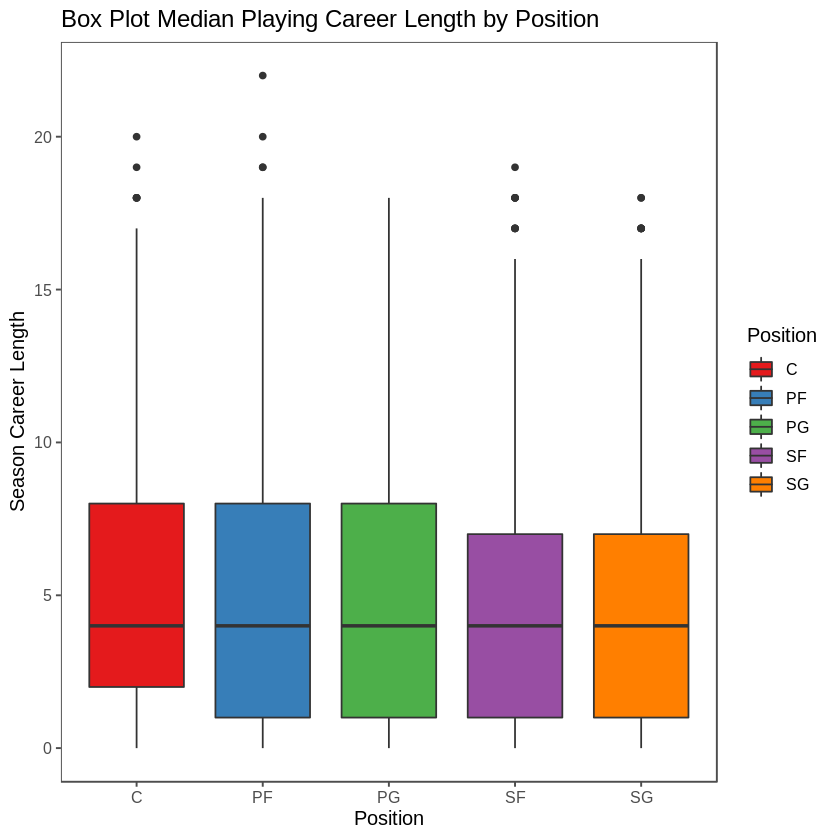

In [18]:
# box plot Median Season Career Length by position
ggplot(df, aes(x=Position, y=Season_Career_Length, fill=Position)) + 
geom_boxplot() +
labs(y="Season Career Length", 
     x="Position", 
     title="Box Plot Median Playing Career Length by Position") + 
scale_fill_brewer(palette = "Set1") + 
theme_few()




<br/><br/>
*** 
Distribution of the median Season Career Length  

Next, we will look at the Distribution of the median Season Career Length grouped by player's position and by seasons. We want to confirm that 4 seasons is the most common median age.  

- create data frame for summary stats of Season Career Length by position by season
- plot Distribution of Median Season Career Length


In [19]:
# mean, median, min, max, std of Season Career Length by position and season
position_stats_season <- df %>% select(c("Year", "Position", 'Season_Career_Length')) %>%
    group_by(Year, Position) %>%
    summarise(mean = mean(Season_Career_Length), 
              median = median(Season_Career_Length), 
              min = min(Season_Career_Length),
              max = max(Season_Career_Length),
              std = sd(Season_Career_Length))

head(position_stats_season)

Year,Position,mean,median,min,max,std
<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
2002,C,3.903846,3,0,17,3.927793
2002,PF,5.588889,5,0,17,4.328880
2002,PG,5.510638,5,0,17,4.384098
2002,SF,5.086420,4,0,17,4.342227
2002,SG,4.557895,4,0,15,3.956454
2003,C,5.067308,4,0,18,4.284233


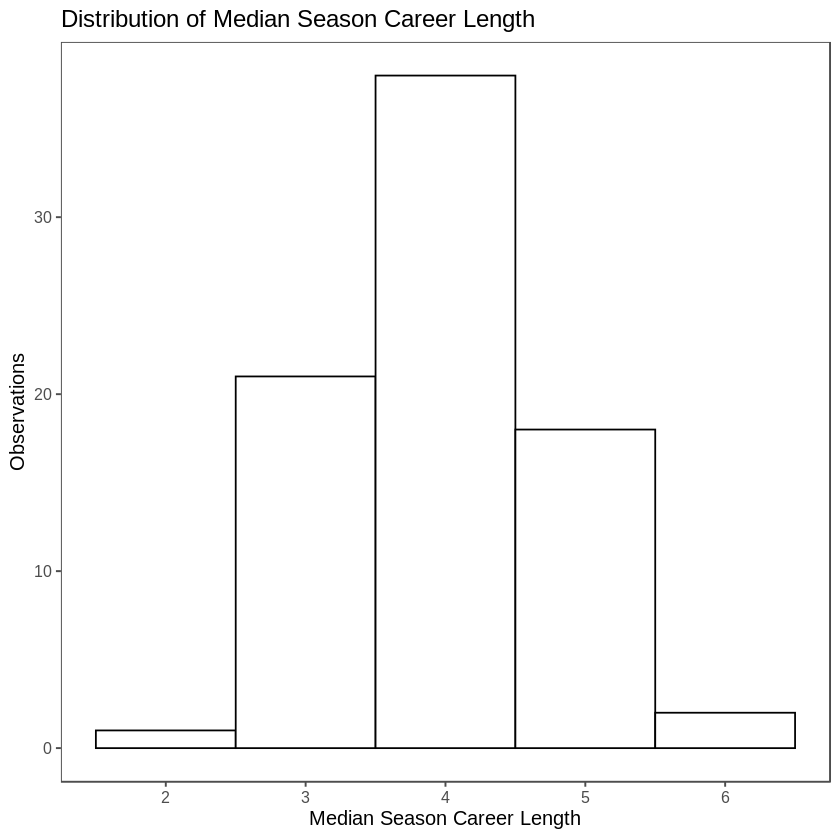

In [20]:
# histogram of Median Season Career Length by position and year
ggplot(position_stats_season, aes(x=median)) + 
geom_histogram(binwidth=1,
               color="black", 
               fill="white") + 
labs(y="Observations", 
     x="Median Season Career Length", 
     title="Distribution of Median Season Career Length") + 
theme_few()
#facet_wrap( ~ Position, ncol=1)


<br/><br/>
### Create Veteran binary variable

Next, we are going to create the **veteran** binary variable.  
Players with over 4 years Season Career Length during the season will be clasified as **Veterans**.


In [21]:
# creating veteran binary variable
# Veteran if Season_Career_Length > 4 
df$veteran[df$Season_Career_Length>4] <- 1
df$veteran[df$Season_Career_Length<=4] <- 0

<br/><br/>
<br/><br/>


# How do Veterans compare to Non-Veterans in player performance metrics?  

We are interested in the differences between Veterans and Non-Veteran platers. 
We will compare groups using the folowing metrics:
- FG.: field goal %
- MPG : minutes per game
- RPG : rebounds per game
- APG : assists per game
- SPG : steals per game
- BPG : blocks per game


## Data preparation
- create categorical variable (g_player_rank) for number of games played by season per player
- subsets main data frame using g_player_rank
- summary statistics for per game metrics
- correlation matrix and plot

We will categorize players into buckets based on number of games they played during the season. We want to compare Veteran and Non-Veterans players who play similar number of games.  

We will create **g_player_rank** variable.Buckets: **Low**, **Mid**, and **High** number of games.

In [22]:
# create 3 buckets (Low, Med, and High) for numer of games played
df$g_player_rank <- cut(df$G, 3, include.lowest=TRUE, labels=c("Low", "Med", "High"))

In [23]:
# check g_player_rank category ranges
df %>%
group_by(g_player_rank) %>%
summarise(min = min(G),
          mean = mean(G),
          median = median(G),
          max = max(G))

g_player_rank,min,mean,median,max
<fct>,<int>,<dbl>,<dbl>,<int>
Low,1,14.04915,14,28
Med,29,42.70763,43,55
High,56,72.29245,74,82


g_player_rank bucket ranges:
- **Low** - 1 to 28 games
- **Mid** - 29 to 55 games
- **High** - 56 to 82 games


How many player records do we have in each bucket?

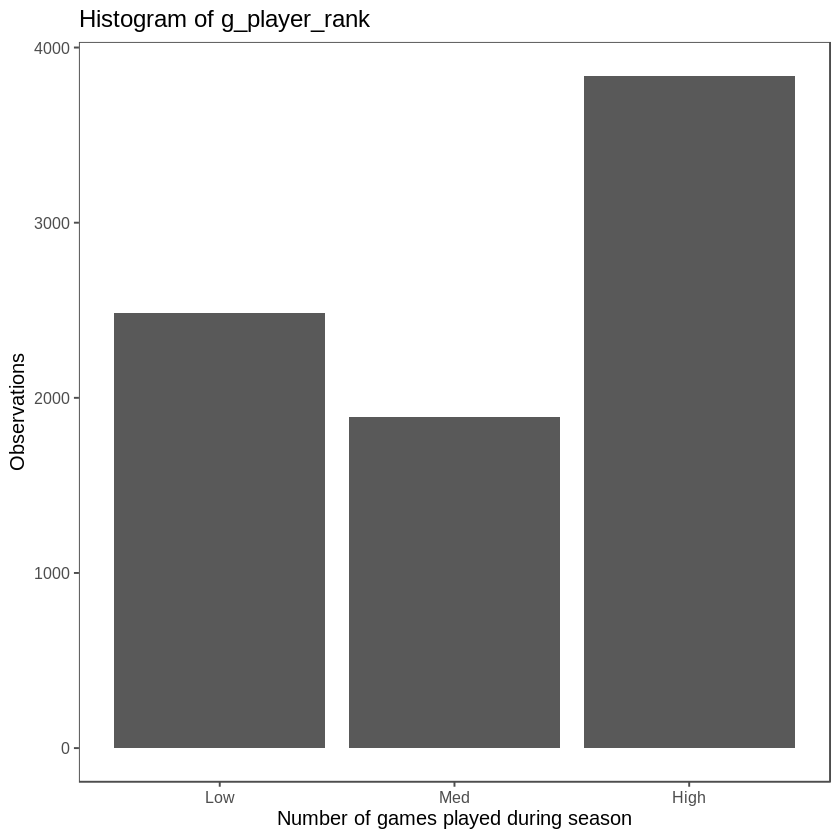

In [24]:
# histogram of g_player_rank
ggplot(df, aes(x=g_player_rank)) + 
geom_bar() +
labs(y="Observations", 
     x="Number of games played during season", 
     title="Histogram of g_player_rank") + 
theme_few()

In [25]:
# subsets main data frame using g_player_rank variable
# players with Low number of Games during Season
df_gl <- df %>% filter(df$g_player_rank == "Low")
# players with Mid number of Games during Season
df_gm <- df %>% filter(df$g_player_rank == "Med")
# players with High number of Games during Season
df_gh <- df %>% filter(df$g_player_rank == "High")

In [26]:
# selecting variables of interest
df_stats <- df %>% select(c('Player',
                            'Position',
                            'g_player_rank',
                            'Year',
                            'Season_Career_Length',
                            'veteran',
                            'FG.', 
                            'MPG', 
                            'PPG', 
                            'RPG', 
                            'BPG', 
                            'SPG', 
                            'APG',
                            'G'))

In [27]:
# summary statistics for per game metrics
summary(df_stats[7:14])

      FG.              MPG             PPG              RPG        
 Min.   :0.0000   Min.   : 0.00   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.3950   1st Qu.:11.64   1st Qu.: 3.366   1st Qu.: 1.714  
 Median :0.4360   Median :19.36   Median : 6.414   Median : 2.889  
 Mean   :0.4327   Mean   :20.06   Mean   : 7.909   Mean   : 3.475  
 3rd Qu.:0.4790   3rd Qu.:28.37   3rd Qu.:11.242   3rd Qu.: 4.615  
 Max.   :1.0000   Max.   :43.70   Max.   :35.400   Max.   :18.000  
 NA's   :46                                                        
      BPG               SPG              APG                G        
 Min.   :0.00000   Min.   :0.0000   Min.   : 0.0000   Min.   : 1.00  
 1st Qu.:0.09677   1st Qu.:0.3000   1st Qu.: 0.5164   1st Qu.:24.00  
 Median :0.24390   Median :0.5429   Median : 1.1508   Median :53.00  
 Mean   :0.39992   Mean   :0.6216   Mean   : 1.7519   Mean   :47.88  
 3rd Qu.:0.50000   3rd Qu.:0.8667   3rd Qu.: 2.3465   3rd Qu.:73.00  
 Max.   :6.00000   Max.   :2.8852   

In [28]:
# correlation between variables of interest 
# excluding Player, Position, g_player_rank, and Year variables
corr <- df_stats %>% select(-c(Player, Position, g_player_rank, Year)) 
corr <- round(cor(corr), 2)

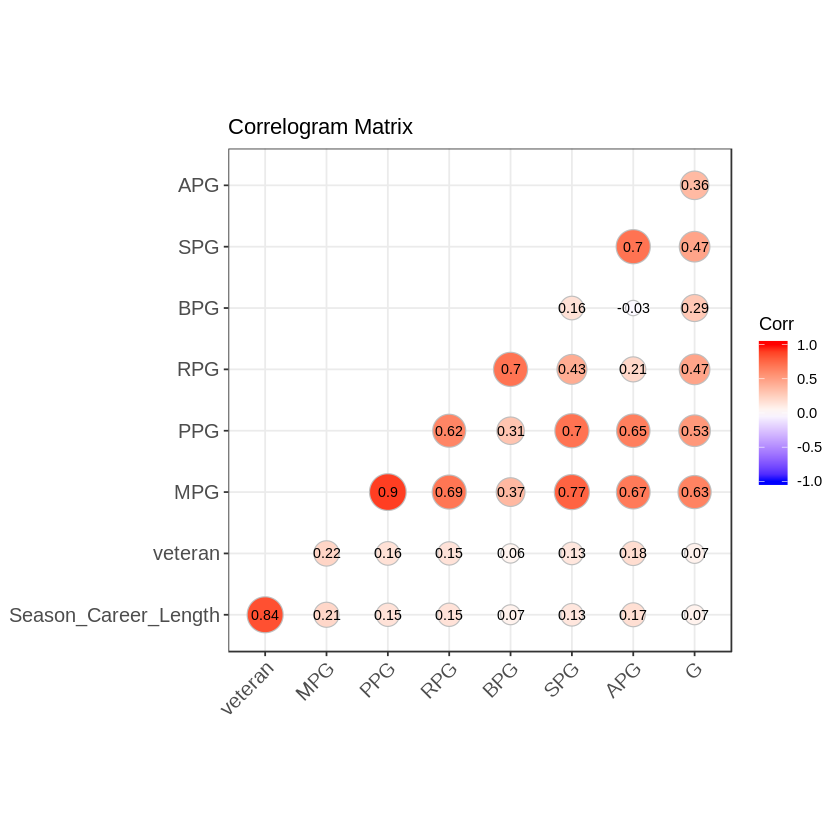

In [29]:
# correlation matrix plot
ggcorrplot(corr,
           type = "lower",
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           title="Correlogram Matrix", 
           ggtheme=theme_bw)

In [30]:
# set veteran variable as factor so we can use it as category
df$veteran <- as.factor(df$veteran)

In [31]:
# plot number of players per season (2002 - 20017)
df %>%
    ggplot(aes(Year)) +
    geom_bar(fill="blue") +
    ggtitle("Number of Players per Season (2002 - 20017)") +
    xlab("Season") +
    ylab("Players") + 
    dark_theme_gray()

ERROR: Error in dark_theme_gray(): could not find function "dark_theme_gray"




## Field goal % (FG.)

We are going to compare Veteran and Non-veterans using field goal % metric. 

- mean and median FG. relative to veteran status
- distribution of FG. relative to veteran status
- density plot FG. relative to veteran status
- box plot of FG. relative to veteran status
- t.test for comparing the means of two groups

In [ ]:
# FG. mean and median relative to veteran status
df_stats %>%
group_by(veteran) %>%
summarise(mean = mean(FG.,na.rm = T),
          median = median(FG.,na.rm = T))

In [ ]:
# field goal % distribution relative to veteran status
df_stats %>%
    ggplot(aes(FG.)) +
    geom_histogram(binwidth = 0.02, color = "black",fill = "grey") +
    labs(title = "Distribution of FG. relative to Veteran status",
         x = "FG.",
         y = "Number of Players") +
    theme_minimal() +
    facet_grid(veteran~.)

In [ ]:
# field goal % density plot relative to veteran status
df_stats %>%
    ggplot(aes(FG.)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Density of FG. relative to Veteran status",
         x = "FG.",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box plot field goal % relative to veteran status
df_stats$veteran <- as.factor(df_stats$veteran)
df_stats %>%
    ggplot(aes(x=veteran, y=FG., fill=veteran)) +
    geom_boxplot() +
    labs(title = "Box Plot of FG. relative to Veteran status",
         x = "Veteran",
         y = "FG.") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

### t.test

Next, we will perform t.test for comparing the means of two groups.

In [ ]:
# t.test for comparing the means of two groups
fg.ttest <- t.test(FG. ~ veteran, data = df_stats)
fg.ttest


The p-value of Two Sample t-test is p = 0.02469.
It’s lower than the significance level 0.05. In conclusion, there is significant difference between the means of the two groups. 

# MPG

We are going to compare Veteran and Non-veterans using minutes per game (MPG) metric. 

- mean and median MPG relative to veteran status
- distribution of MPG relative to veteran status
- mean MPG by season by veteran status
- t.test for comparing the means of two groups

In [ ]:
# MPG mean and median relative to veteran status
df_stats %>%
group_by(veteran) %>%
summarise(mean = mean(MPG,na.rm = T),
          median = median(MPG,na.rm = T))

In [ ]:
# MPG distribution relative to veteran status
df_stats %>%
    ggplot(aes(MPG)) +
    geom_histogram(binwidth = 1, color = "black",fill = "grey") +
    labs(title = "Distribution of MPG relative to Veteran status",
         x = "MPG",
         y = "Number of Players") +
    theme_minimal() +
    facet_grid(veteran~.)

In [ ]:
# create data frame for mean MPG by season relative to veteran status
mpg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(MPG))

In [ ]:
# plot Mean MPG by season by veteran status
mpg_season %>% 
ggplot(aes(x=Year, y=mean, colour = veteran)) + 
geom_line(size = 2) + 
labs(title="Average MPG Veteran vs Non-Veteran", y = "Average MPG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


### t.test

Next, we will perform t.test for comparing the means of two groups.

In [ ]:
mpg.ttest <- t.test(MPG ~ veteran, data = df_stats)
mpg.ttest

The p-value of Two Sample t-test is p = 2.2e-16.
It’s lower than the significance level 0.05. In conclusion, there is significant difference between the means of the two groups. 

# PPG

We are going to compare Veteran and Non-veterans using points per game (PPG) metric. 

- mean and median PPG relative to veteran status
- mean and median PPG relative to veteran status by number of games played (g_player_rank)
- mean PPG relative to veteran status by seasons 
- density plot PPG relative to veteran status
- t.test for comparing the means of two groups


In [ ]:
# mean and median PPG for veteran and non-veterans 
df_stats %>%
group_by(veteran) %>%
summarise(mean = mean(PPG),
          median = median(PPG))

In [ ]:
# mean and median PPG for veteran and non-veterans by number of games played buckets (g_player_rank)
df %>%
group_by(veteran, g_player_rank) %>%
summarise(mean = mean(PPG),
          median = median(PPG))

Overall, Veterans have higher PPG compared to Non-Veterans accorss all number of games played buckets. 

Next, lets look at the mean PPG by veteran status by seasons.

In [ ]:
# create data frame for mean ppg by veteran status by seasons 
ppg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(PPG))

In [ ]:
# plot mean ppg by veteran status by seasons 
ppg_season %>% 
ggplot(aes(x=Year, y=mean, colour = veteran)) + 
geom_line(size = 2) + 
labs(title="Average PPG Veteran vs Non-Veteran", y = "Average PPG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# density plot PPG relative to Veteran status
df_stats %>%
    ggplot(aes(PPG)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Density of PPG relative to Veteran status",
         x = "PPG",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box-plot PPG relative to Veteran status
df %>%
    ggplot(aes(x=veteran, y=PPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Box-Plot of PPG relative to Veteran status",
         x = "Veteran",
         y = "PPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

We will also look at box-plots of PPG relative to Veteran status grouped by number of games played buckets (g_player_rank).

In [ ]:
# box-plot PPG relative to Veteran status
# facet grid using g_player_rank
df %>%
    ggplot(aes(x=veteran, y=PPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Box-Plot of PPG relative to Veteran status",
         x = "Veteran",
         y = "PPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal() + 
    facet_grid(g_player_rank~.)

### t.test

Next, we will perform t.test for comparing the means of two groups.  
We will also perform t.test using number of games played buckets.

In [ ]:
# Two Sample t-test PPG between Veterans and Non-Veterans
ppg.ttest <- t.test(PPG ~ veteran, data = df)
ppg.ttest

In [ ]:
# Two Sample t-test PPG between Veterans and Non-Veterans
# for players who played Low number of games during the season
ppg_l.ttest <- t.test(PPG ~ veteran, data = df_gl)
ppg_l.ttest

In [ ]:
# Two Sample t-test PPG between Veterans and Non-Veterans
# for players who played Medium number of games during the season
ppg_m.ttest <- t.test(PPG ~ veteran, data = df_gm)
ppg_m.ttest

In [ ]:
# Two Sample t-test PPG between Veterans and Non-Veterans
# for players who played High number of games during the season
ppg_h.ttest <- t.test(PPG ~ veteran, data = df_gh)
ppg_h.ttest

All **four** Two Sample t-test have low p-values. In conclusion, there is significant difference between the means of the two groups in all data sets.

# RPG

We are going to compare Veteran and Non-veterans using rebounds per game (RPG) metric. 

- mean and median RPG relative to veteran status
- mean and median RPG relative to veteran status by number of games played (g_player_rank)
- mean RPG relative to veteran status by seasons 
- density plot RPG relative to veteran status
- t.test for comparing the means of two groups


In [ ]:
# mean and median RPG for veteran and non-veterans 
df %>%
group_by(veteran) %>%
summarise(mean = mean(RPG),
          median = median(RPG))

In [ ]:
# mean and median RPG for veteran and non-veterans by number of games played buckets (g_player_rank)
df %>%
group_by(veteran, g_player_rank) %>%
summarise(mean = mean(RPG),
          median = median(RPG))

In [ ]:
# create data frame for mean RPG by veteran status by seasons 
rpg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(RPG))

In [ ]:
# plot mean RPG by veteran status by seasons 
rpg_season %>% 
ggplot(aes(x=Year, y=mean, color = veteran)) + 
geom_line(size = 2) + 
labs(title="Average RPG Veteran vs Non-Veteran", y = "Average RPG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# density plot RPG relative to Veteran status
df %>%
    ggplot(aes(RPG)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Distribution of RPG relative to Veteran status",
         x = "RPG",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box plot RPG by Veteran status
df %>%
    ggplot(aes(x=veteran, y=RPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of RPG relative to Veteran status",
         x = "Veteran",
         y = "RPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

We will also look at box-plots of RPG relative to Veteran status grouped by number of games played buckets (g_player_rank).

In [ ]:
# box-plot RPG relative to Veteran status
# facet grid using g_player_rank
df %>%
    ggplot(aes(x=veteran, y=RPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of RPG relative to Veteran status",
         x = "Veteran",
         y = "RPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal() + 
    facet_grid(g_player_rank~.)

In [ ]:
# Two Sample t-test RPG between Veterans and Non-Veterans
rpg.ttest <- t.test(RPG ~ veteran, data = df)
rpg.ttest

In [ ]:
# Two Sample t-test RPG between Veterans and Non-Veterans
# for players who played Low number of games during the season
rpg_l.ttest <- t.test(RPG ~ veteran, data = df_gl)
rpg_l.ttest

In [ ]:
# Two Sample t-test RPG between Veterans and Non-Veterans
# for players who played Medium number of games during the season
rpg_l.ttest <- t.test(RPG ~ veteran, data = df_gm)
rpg_l.ttest

In [ ]:
# Two Sample t-test RPG between Veterans and Non-Veterans
# for players who played High number of games during the season
rpg_l.ttest <- t.test(RPG ~ veteran, data = df_gl)
rpg_l.ttest

All **four** Two Sample t-test have low p-values. In conclusion, there is significant difference between the means of the two groups in all data sets.

# BPG

We are going to compare Veteran and Non-veterans using blocks per game (BPG) metric. 

- mean and median BPG relative to veteran status
- mean and median BPG relative to veteran status by number of games played (g_player_rank)
- mean BPG relative to veteran status by seasons 
- density plot BPG relative to veteran status
- t.test for comparing the means of two groups


In [ ]:
# mean and median BPG for veteran and non-veterans 
df %>%
group_by(veteran) %>%
summarise(mean = mean(BPG),
          median = median(BPG))

In [ ]:
# mean and median BPG for veteran and non-veterans by number of games played buckets (g_player_rank)
df %>%
group_by(veteran, g_player_rank) %>%
summarise(mean = mean(BPG),
          median = median(BPG))

In [ ]:
# create data frame for mean BPG by veteran status by seasons 
bpg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(BPG))


In [ ]:
# plot mean BPG by veteran status by seasons 
bpg_season %>% 
ggplot(aes(x=Year, y=mean, color = veteran)) + 
geom_line(size = 2) + 
labs(title="Average BPG Veteran vs Non-Veteran", y = "Average BPG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# density plot BPG relative to Veteran status
df %>%
    ggplot(aes(BPG)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Distribution of BPG relative to Veteran status",
         x = "BPG",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box plot RPG by Veteran status
df %>%
    ggplot(aes(x=veteran, y=BPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of BPG relative to Veteran status",
         x = "Veteran",
         y = "BPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

We will also look at box-plots of BPG relative to Veteran status grouped by number of games played buckets (g_player_rank).

In [ ]:
# box-plot BPG relative to Veteran status
# facet grid using g_player_rank
df %>%
    ggplot(aes(x=veteran, y=BPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of BPG relative to Veteran status",
         x = "Veteran",
         y = "BPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal() + 
    facet_grid(g_player_rank~.)

In [ ]:
# Two Sample t-test BPG between Veterans and Non-Veterans
bpg.ttest <- t.test(BPG ~ veteran, data = df)
bpg.ttest

In [ ]:
# Two Sample t-test BPG between Veterans and Non-Veterans
# for players who played Low number of games during the season
bpg_l.ttest <- t.test(BPG ~ veteran, data = df_gl)
bpg_l.ttest

In [ ]:
# Two Sample t-test BPG between Veterans and Non-Veterans
# for players who played Mid number of games during the season
bpg_m.ttest <- t.test(BPG ~ veteran, data = df_gm)
bpg_m.ttest

In [ ]:
# Two Sample t-test BPG between Veterans and Non-Veterans
# for players who played High number of games during the season
bpg_h.ttest <- t.test(BPG ~ veteran, data = df_gh)
bpg_h.ttest


Using the full data set, BPG between Veterans and Non-Veterans had low p-value. 
Players in Low number of games during the season bucket also had low p-value. 
There is significant difference between the means of the two groups in both tests.

Players in Mid and High number of games during the season buckets had high p-values. 
There is NO significant difference between the means of the two groups in both tests.


# SPG

We are going to compare Veteran and Non-veterans using steals per game (SPG) metric. 

- mean and median SPG relative to veteran status
- mean and median SPG relative to veteran status by number of games played (g_player_rank)
- mean SPG relative to veteran status by seasons 
- density plot SPG relative to veteran status
- t.test for comparing the means of two groups

In [ ]:
# mean and median SPG for veteran and non-veterans 
df %>%
group_by(veteran) %>%
summarise(mean = mean(SPG),
          median = median(SPG))

In [ ]:
# mean and median SPG for veteran and non-veterans by number of games played buckets (g_player_rank)
df %>%
group_by(veteran, g_player_rank) %>%
summarise(mean = mean(SPG),
          median = median(SPG))

In [ ]:
# create data frame for mean SPG by veteran status by seasons 
spg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(SPG))

In [ ]:
# plot mean SPG by veteran status by seasons 
spg_season %>% 
ggplot(aes(x=Year, y=mean, color = veteran)) + 
geom_line(size = 2) + 
labs(title="Average SPG Veteran vs Non-Veteran", y = "Average SPG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# density plot SPG relative to Veteran status
df %>%
    ggplot(aes(SPG)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Distribution of SPG relative to Veteran status",
         x = "SPG",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box plot SPG by Veteran status
df %>%
    ggplot(aes(x=veteran, y=SPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of SPG relative to Veteran status",
         x = "Veteran",
         y = "SPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

We will also look at box-plots of SPG relative to Veteran status grouped by number of games played buckets (g_player_rank).

In [ ]:
# box-plot SPG relative to Veteran status
# facet grid using g_player_rank
df %>%
    ggplot(aes(x=veteran, y=SPG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of SPG relative to Veteran status",
         x = "Veteran",
         y = "BPG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal() + 
    facet_grid(g_player_rank~.)

In [ ]:
# Two Sample t-test SPG between Veterans and Non-Veterans
spg.ttest <- t.test(SPG ~ veteran, data = df)
spg.ttest

In [ ]:
# Two Sample t-test SPG between Veterans and Non-Veterans
# for players who played Low number of games during the season
spg_l.ttest <- t.test(SPG ~ veteran, data = df_gl)
spg_l.ttest

In [ ]:
# Two Sample t-test SPG between Veterans and Non-Veterans
# for players who played Medium number of games during the season
spg_m.ttest <- t.test(SPG ~ veteran, data = df_gm)
spg_m.ttest

In [ ]:
# Two Sample t-test SPG between Veterans and Non-Veterans
# for players who played High number of games during the season
spg_h.ttest <- t.test(SPG ~ veteran, data = df_gh)
spg_h.ttest

All **four** Two Sample t-test have low p-values. In conclusion, there is significant difference between the means of the two groups in all data sets.

# APG

We are going to compare Veteran and Non-veterans using assists per game (APG) metric. 

- mean and median APG relative to veteran status
- mean and median APG relative to veteran status by number of games played (g_player_rank)
- mean APG relative to veteran status by seasons 
- density plot APG relative to veteran status
- t.test for comparing the means of two groups

In [ ]:
# mean and median APG for veteran and non-veterans 
df %>%
group_by(veteran) %>%
summarise(mean = mean(APG),
          median = median(APG))

In [ ]:
# mean and median APG for veteran and non-veterans by number of games played buckets (g_player_rank)
df %>%
group_by(veteran, g_player_rank) %>%
summarise(mean = mean(APG),
          median = median(APG))

In [ ]:
# create data frame for mean APG by veteran status by seasons 
apg_season <- df_stats %>% group_by(veteran, Year) %>%
summarise(mean = mean(APG))


In [ ]:
# plot mean APG by veteran status by seasons 
apg_season %>% 
ggplot(aes(x=Year, y=mean, color = veteran)) + 
geom_line(size = 2) + 
labs(title="Average APG Veteran vs Non-Veteran", y = "Average APG" , x = "Season") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# density plot APG relative to Veteran status
df %>%
    ggplot(aes(APG)) +
    geom_density(aes(fill=factor(veteran)), alpha=0.5) + 
    labs(title = "Distribution of APG relative to Veteran status",
         x = "APG",
         y = "Density") +
    scale_fill_brewer(palette = "Set1") + 
    theme_few()

In [ ]:
# box plot APG by Veteran status
df %>%
    ggplot(aes(x=veteran, y=APG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of APG relative to Veteran status",
         x = "Veteran",
         y = "APG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal()

We will also look at box-plots of APG relative to Veteran status grouped by number of games played buckets (g_player_rank).

In [ ]:
# box-plot APG relative to Veteran status
# facet grid using g_player_rank
df %>%
    ggplot(aes(x=veteran, y=APG, fill=veteran)) +
    geom_boxplot() +
    labs(title = "Distribution of APG relative to Veteran status",
         x = "Veteran",
         y = "APG") +
    scale_fill_brewer(palette = "Set1") + 
    theme_minimal() + 
    facet_grid(g_player_rank~.)

In [ ]:
# Two Sample t-test APG between Veterans and Non-Veterans
apg.ttest <- t.test(APG ~ veteran, data = df)
apg.ttest

In [ ]:
# Two Sample t-test APG between Veterans and Non-Veterans
# for players who played Low number of games during the season
apg_l.ttest <- t.test(APG ~ veteran, data = df_gl)
apg_l.ttest


In [ ]:
# Two Sample t-test APG between Veterans and Non-Veterans
# for players who played Medium number of games during the season
apg_m.ttest <- t.test(APG ~ veteran, data = df_gm)
apg_m.ttest

In [ ]:
# Two Sample t-test APG between Veterans and Non-Veterans
# for players who played High number of games during the season
apg_h.ttest <- t.test(APG ~ veteran, data = df_gh)
apg_h.ttest

All **four** Two Sample t-test have low p-values. In conclusion, there is significant difference between the means of the two groups in all data sets.

# Visualization for comparing Veterans vs Non-Veterans 

We will create a vizualization for a direct comparison of Veterans and Non-Verterans per game metrics.  
First, we will standardize the metrics so we can draw them using the same scale.  
Radar plots will be used for the vizualization. https://plotly.com/r/radar-chart/


- scale the per game metrics
- subset data by number of games per season buckets
- data frames for radar plots
- radar plots

In [ ]:
# scale the per game metrics
# we are goingto standardize per game variables so we can vizualize them together using the same scale
# we need this in order to create radar plot visualizations
# https://en.wikipedia.org/wiki/Standard_score
df_scaled <- df_stats %>% mutate_at(vars(c(FG.:APG)), scale)

# subset by g_player_rank
df_scaled_gl <- df_scaled %>% filter(g_player_rank == "Low")
df_scaled_gm <- df_scaled %>% filter(g_player_rank == "Med")
df_scaled_gh <- df_scaled %>% filter(g_player_rank == "High")

In [ ]:
# data frame for radar plot using all data
radar <- df_scaled %>%
    group_by(veteran) %>%
    summarise(FG. = mean(FG., na.rm=T),
              Minutes = mean(MPG, na.rm=T),
              Points = mean(PPG, na.rm=T),
              Rebounds = mean(RPG, na.rm=T),
              Assist = mean(APG, na.rm=T),
              Steal = mean(SPG, na.rm=T),
              Block = mean(BPG, na.rm=T)) %>%
select(-veteran)

# data frame for radar plot for players in the Low bucket
radar_gl <- df_scaled_gl %>%
    group_by(veteran) %>%
    summarise(FG. = mean(FG., na.rm=T),
              Minutes = mean(MPG, na.rm=T),
              Points = mean(PPG, na.rm=T),
              Rebounds = mean(RPG, na.rm=T),
              Assist = mean(APG, na.rm=T),
              Steal = mean(SPG, na.rm=T),
              Block = mean(BPG, na.rm=T)) %>%
select(-veteran)

# data frame for radar plot for players in the Medium bucket
radar_gm <- df_scaled_gm %>%
    group_by(veteran) %>%
    summarise(FG. = mean(FG., na.rm=T),
              Minutes = mean(MPG, na.rm=T),
              Points = mean(PPG, na.rm=T),
              Rebounds = mean(RPG, na.rm=T),
              Assist = mean(APG, na.rm=T),
              Steal = mean(SPG, na.rm=T),
              Block = mean(BPG, na.rm=T)) %>%
select(-veteran)

# data frame for radar plot for players in the High bucket
radar_gh <- df_scaled_gh %>%
    group_by(veteran) %>%
    summarise(FG. = mean(FG., na.rm=T),
              Minutes = mean(MPG, na.rm=T),
              Points = mean(PPG, na.rm=T),
              Rebounds = mean(RPG, na.rm=T),
              Assist = mean(APG, na.rm=T),
              Steal = mean(SPG, na.rm=T),
              Block = mean(BPG, na.rm=T)) %>%
select(-veteran)


In [ ]:
# radar plot setup using all data
# code from https://plotly.com/r/radar-chart/
fig <- plot_ly(
    type = 'scatterpolar',
    fill = 'toself',
    mode = 'markers'
  ) 
fig <- fig %>%
  add_trace(
    r = as.numeric(as.vector(radar[1,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Non-Veterans'
  ) 
fig <- fig %>%
  add_trace(
    r = as.numeric(as.vector(radar[2,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Veterans',
    opacity = 0.5
  ) 
fig <- fig %>%
  layout(
    polar = list(
      radialaxis = list(
        visible = T,
        range = c(-1, 1))
    )
  )

In [ ]:
# radar plot setup for players in the Low bucket
# code from https://plotly.com/r/radar-chart/
fig2 <- plot_ly(
    type = 'scatterpolar',
    fill = 'toself',
    mode = 'markers'
  ) 
fig2 <- fig2 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gl[1,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Non-Veterans'
  ) 
fig2 <- fig2 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gl[2,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Veterans',
    opacity = 0.5
  ) 
fig2 <- fig2 %>%
  layout(
    polar = list(
      radialaxis = list(
        visible = T,
        range = c(-1, 1))
    )
  )

In [ ]:
# radar plot setup for players in the Medium bucket
# code from https://plotly.com/r/radar-chart/
fig3 <- plot_ly(
    type = 'scatterpolar',
    fill = 'toself',
    mode = 'markers'
  ) 
fig3 <- fig3 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gm[1,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Non-Veterans'
  ) 
fig3 <- fig3 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gm[2,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Veterans',
    opacity = 0.5
  ) 
fig3 <- fig3 %>%
  layout(
    polar = list(
      radialaxis = list(
        visible = T,
        range = c(-1, 1))
    )
  )

In [ ]:
# radar plot setup for players in the High bucket
# code from https://plotly.com/r/radar-chart/
fig4 <- plot_ly(
    type = 'scatterpolar',
    fill = 'toself',
    mode = 'markers'
  ) 
fig4 <- fig4 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gh[1,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Non-Veterans'
  ) 
fig4 <- fig4 %>%
  add_trace(
    r = as.numeric(as.vector(radar_gh[2,])),
    theta = c('FG.','Minutes','Points', 'Rebounds', 'Assist', 'Steal', 'Block'),
    name = 'Veterans',
    opacity = 0.5
  ) 
fig4 <- fig4 %>%
  layout(
    polar = list(
      radialaxis = list(
        visible = T,
        range = c(-1, 1))
    )
  )

In [ ]:
###### WARNING ###### 
# sometimes the output doesnt show up on first run
# rerun the cell if no output 
# show radar plot for all data
fig

In [ ]:
###### WARNING ###### 
# sometimes the output doesnt show up on first run
# rerun the cell if no output 
# show radar plot for Low number of games bucket
fig2

In [ ]:
###### WARNING ###### 
# sometimes the output doesnt show up on first run
# rerun the cell if no output 
# show radar plot for Medium number of games bucket
fig3

In [ ]:
###### WARNING ###### 
# sometimes the output doesnt show up on first run
# rerun the cell if no output 
# show radar plot for High number of games bucket
fig4

# How do Veterans perform over time?

We want to know how does Veterans performance change over time. 
We will look at the folowing metrics:
- FG.: field goal %
- MPG : minutes per game
- RPG : rebounds per game
- APG : assists per game
- SPG : steals per game
- BPG : blocks per game

 

### Data Preperation

- subset veteran players
- set Season_Career_Length variable as factor

In [ ]:
# subset veteran players into new data frame
df_stats_v <- df_stats %>% filter(df_stats$veteran==1)

In [ ]:
# set Season_Career_Length variable as factor
df_stats_v$Season_Career_Length <- as.factor(df_stats_v$Season_Career_Length)

In [ ]:
# Box-plot MPG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=MPG)) + 
geom_boxplot() +
labs(y="MPG", 
     x="Season Career Length", 
     title="Veterans Box Plot MPG by Season Career Length") + 
theme_few()


In [ ]:
# Veterans Average MPG by Season Career Length
mpg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(MPG))

mpg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran MPG over Season Career Length", y = "Average MPG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# Box-plot PPG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=PPG)) + 
geom_boxplot() +
labs(y="APG", 
     x="Season Career Length", 
     title="Veterans Box Plot PPG by Season Career Length") + 
theme_few()


In [ ]:
# Veterans Average PPG by Season Career Length data frame
ppg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(PPG))

# line plot Veterans Average PPG by Season Career Length 
ppg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran PPG over Season Career Length", y = "Average PPG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# Box-plot APG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=APG)) + 
geom_boxplot() +
labs(y="APG", 
     x="Season Career Length", 
     title="Veterans Box Plot APG by Seasons") + 
theme_few()


In [ ]:
# Veterans Average PPG by Season Career Length data frame
apg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(APG))

# line plot Veterans Average PPG by Season Career Length 
apg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran APG over Season Career Length", y = "Average APG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# Box-plot APG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=RPG)) + 
geom_boxplot() +
labs(y="RPG", 
     x="Season Career Length", 
     title="Veterans Box Plot RPG by Seasons") + 
theme_few()


In [ ]:
# Veterans Average RPG by Season Career Length data frame
rpg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(RPG))
# line plot Veterans Average RPG by Season Career Length 
rpg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran RPG over Season Career Length", y = "Average RPG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# Box-plot SPG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=SPG)) + 
geom_boxplot() +
labs(y="SPG", 
     x="Season Career Length", 
     title="Veterans Box Plot SPG by Seasons") + 
theme_few()


In [ ]:
# Veterans Average SPG by Season Career Length data frame
spg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(SPG))
# line plot Veterans Average SPG by Season Career Length 
spg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran SPG over Season Career Length", y = "Average SPG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")


In [ ]:
# Box-plot BPG by Season Career Length
df_stats_v %>% 
ggplot(aes(x=Season_Career_Length, y=BPG)) + 
geom_boxplot() +
labs(y="BPG", 
     x="Season Career Length", 
     title="Veterans Box Plot BPG by Seasons") + 
theme_few()


In [ ]:
# Veterans Average BPG by Season Career Length data frame
bpg_season_v <- df_stats_v %>% group_by(Year) %>%
summarise(mean = mean(BPG))
# line plot Veterans Average BPG by Season Career Length bpg_season_v <- df_stats_v %>% group_by(Year) %>%
bpg_season_v %>% 
ggplot(aes(x=Year, y=mean)) + 
geom_line(size = 1) + 
labs(title="Average Veteran BPG over Season Career Length", y = "Average BPG" , x = "Season Career Length") +
theme_few() + theme(legend.position="bottom")

# End of Analysis and Visualization Notebook